# Random Forest

In [10]:
import pandas as pd 
import json
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [11]:
SUMMARY_FILE = 'summary1.json'

def load_summary_data(filepath):
    with open(filepath, 'r') as f:
        summary = json.load(f)
    
    parameters = summary['metrics_per_fold'][0]['parameters']
    
    average_tree_stats = summary['metrics_per_fold'][1]['average_tree_stats']
    
    fold_metrics = []
    for fold_data in summary['metrics_per_fold'][2:]:
        if 'fold' in fold_data:
            fold_metrics.append(fold_data)
    
    df = pd.DataFrame(fold_metrics)
    
    df['parameters'] = str(parameters)
    df['average_tree_stats'] = str(average_tree_stats)
    
    return df


df_forest = load_summary_data(SUMMARY_FILE)


df_forest.head()

,fold,confusion_matrix,classification_report,parameters,average_tree_stats
0,1,"[[38, 1, 0, 0], [1, 156, 5, 0], [0, 16, 78, 2]...","{'1': {'precision': 0.9743589743589743, 'recal...","{'n_estimators': 10, 'criterion': 'gini', 'max...","{'average_tree_depth': 13.8, 'average_tree_imp..."
1,2,"[[36, 7, 0, 0], [0, 159, 11, 0], [0, 11, 70, 2...","{'1': {'precision': 1.0, 'recall': 0.837209302...","{'n_estimators': 10, 'criterion': 'gini', 'max...","{'average_tree_depth': 13.8, 'average_tree_imp..."
2,3,"[[34, 11, 0, 0], [2, 144, 8, 0], [0, 16, 80, 0...","{'1': {'precision': 0.9444444444444444, 'recal...","{'n_estimators': 10, 'criterion': 'gini', 'max...","{'average_tree_depth': 13.8, 'average_tree_imp..."
3,4,"[[47, 8, 0, 0], [3, 161, 14, 0], [0, 9, 48, 0]...","{'1': {'precision': 0.94, 'recall': 0.85454545...","{'n_estimators': 10, 'criterion': 'gini', 'max...","{'average_tree_depth': 13.8, 'average_tree_imp..."
4,5,"[[44, 8, 0, 0], [2, 163, 3, 0], [0, 10, 61, 1]...","{'1': {'precision': 0.9565217391304348, 'recal...","{'n_estimators': 10, 'criterion': 'gini', 'max...","{'average_tree_depth': 13.8, 'average_tree_imp..."


# gráficos de desempenho por fold

C:\Users\alexp\AppData\Local\Temp\ipykernel_9652\4163190605.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(1, len(accuracy)+1), y=accuracy, ax=axes[0, 0], palette="Blues_d")
C:\Users\alexp\AppData\Local\Temp\ipykernel_9652\4163190605.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(1, len(precision)+1), y=precision, ax=axes[0, 1], palette="Greens_d")
C:\Users\alexp\AppData\Local\Temp\ipykernel_9652\4163190605.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range(1, len(recall)+1), y=recall, ax=axes[1, 0], pal

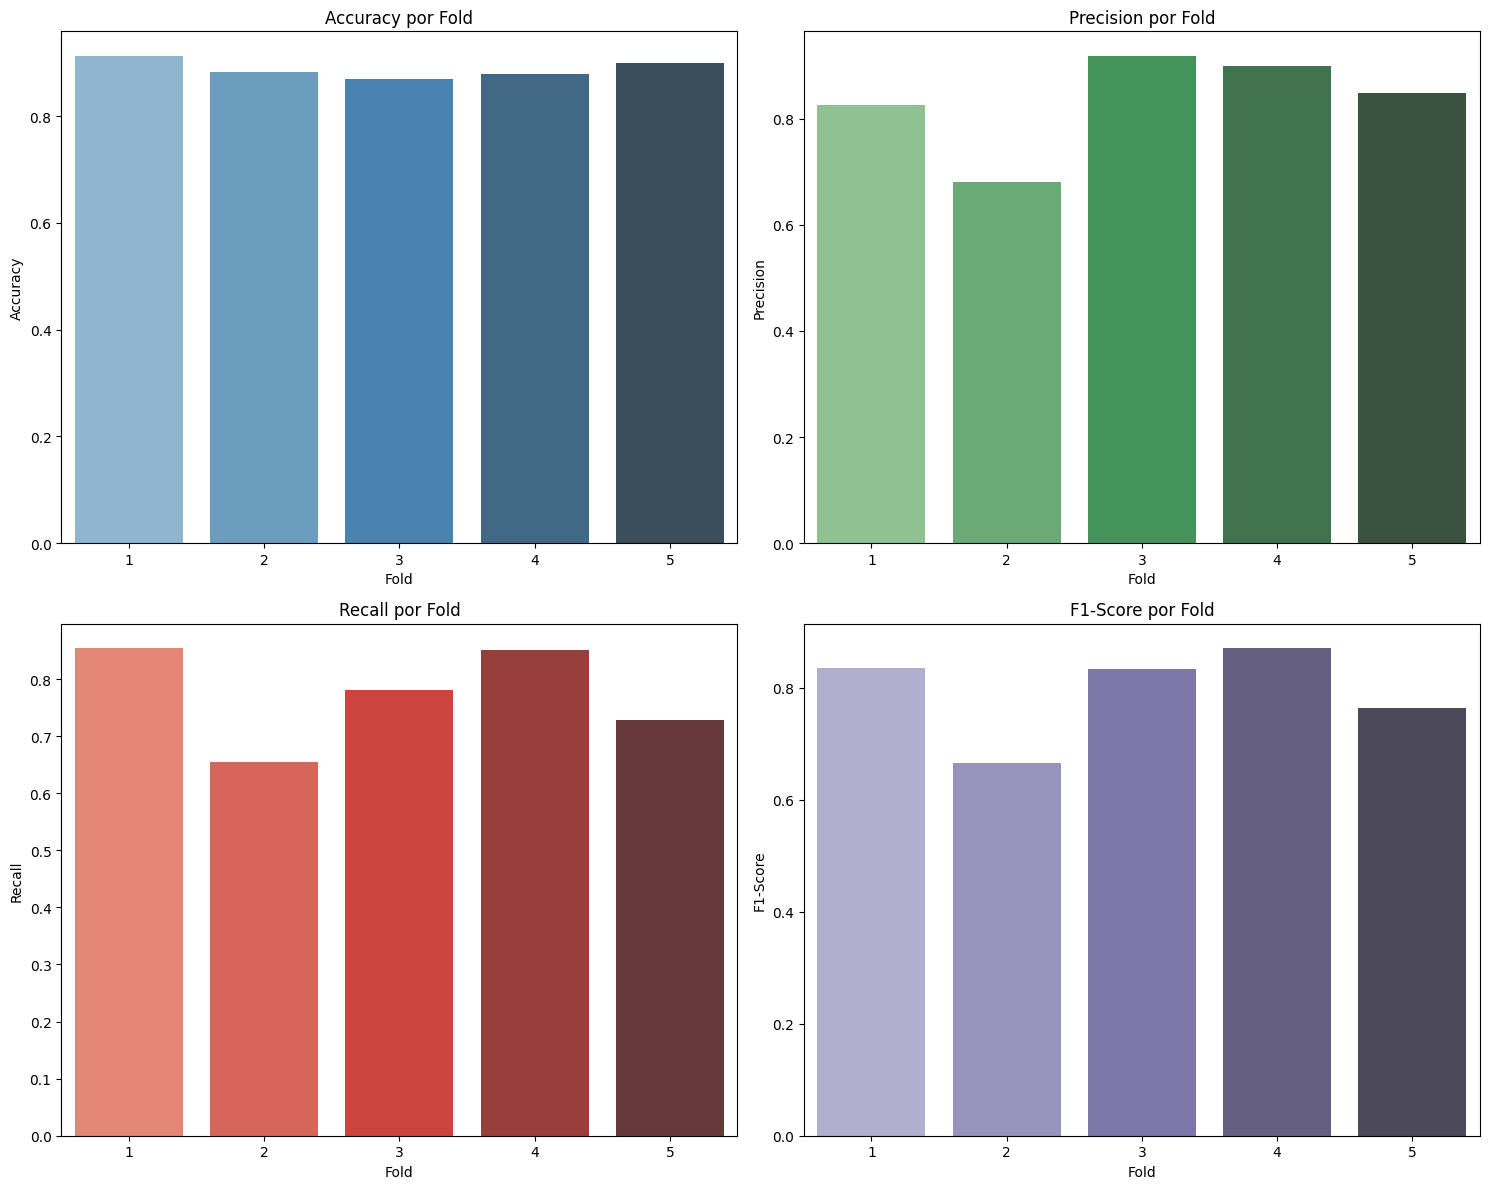

In [12]:
def plot_performance_by_fold(df):
    # Extrair as métricas de classificação por fold
    accuracy = []
    precision = []
    recall = []
    f1_score = []
    
    for i, row in df.iterrows():
        metrics = row['classification_report']
        accuracy.append(metrics['accuracy'])
        precision.append(metrics['macro avg']['precision'])
        recall.append(metrics['macro avg']['recall'])
        f1_score.append(metrics['macro avg']['f1-score'])
    
    # Plotar os gráficos de barras para cada métrica
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Gráfico de Accuracy
    sns.barplot(x=range(1, len(accuracy)+1), y=accuracy, ax=axes[0, 0], palette="Blues_d")
    axes[0, 0].set_title("Accuracy por Fold")
    axes[0, 0].set_xlabel("Fold")
    axes[0, 0].set_ylabel("Accuracy")
    
    # Gráfico de Precision
    sns.barplot(x=range(1, len(precision)+1), y=precision, ax=axes[0, 1], palette="Greens_d")
    axes[0, 1].set_title("Precision por Fold")
    axes[0, 1].set_xlabel("Fold")
    axes[0, 1].set_ylabel("Precision")
    
    # Gráfico de Recall
    sns.barplot(x=range(1, len(recall)+1), y=recall, ax=axes[1, 0], palette="Reds_d")
    axes[1, 0].set_title("Recall por Fold")
    axes[1, 0].set_xlabel("Fold")
    axes[1, 0].set_ylabel("Recall")
    
    # Gráfico de F1-Score
    sns.barplot(x=range(1, len(f1_score)+1), y=f1_score, ax=axes[1, 1], palette="Purples_d")
    axes[1, 1].set_title("F1-Score por Fold")
    axes[1, 1].set_xlabel("Fold")
    axes[1, 1].set_ylabel("F1-Score")
    
    plt.tight_layout()
    plt.show()

plot_performance_by_fold(df_forest)

# matriz de confusão como mapa de calor

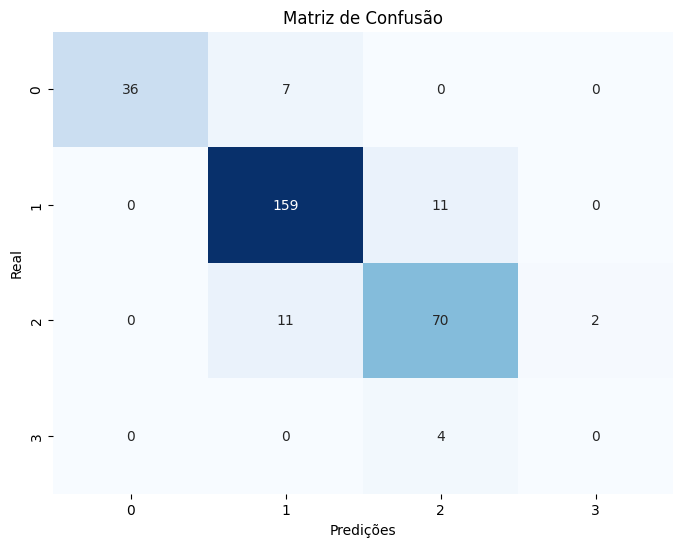

In [13]:
def plot_confusion_matrix(conf_matrix):
    # Mapa de calor para a matriz de confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=True, yticklabels=True)
    plt.title("Matriz de Confusão")
    plt.xlabel('Predições')
    plt.ylabel('Real')
    plt.show()

plot_confusion_matrix(df_forest.iloc[1]['confusion_matrix'])  # Usando a primeira fold para o exemplo



# Comparar as classes

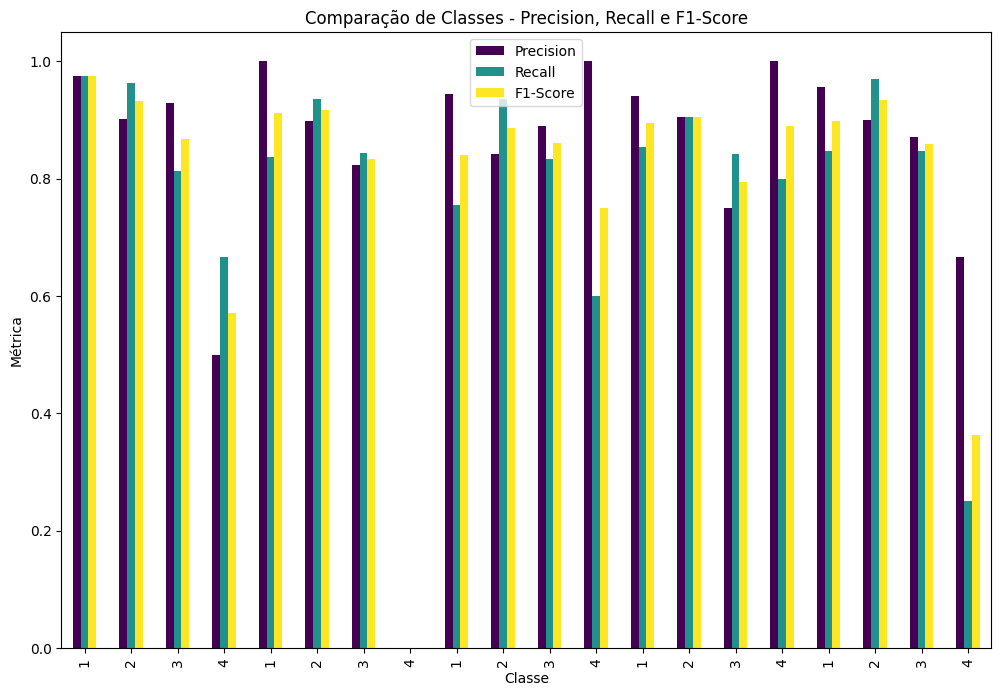

In [14]:
def plot_class_comparison(df):
    # Comparar as classes usando a precisão, recall e f1-score
    precision = []
    recall = []
    f1_score = []
    classes = []

    # Extrair as métricas de cada classe
    for i, row in df.iterrows():
        class_report = row['classification_report']
        for label, metrics in class_report.items():
            if label not in ['accuracy', 'macro avg', 'weighted avg']:
                classes.append(label)
                precision.append(metrics['precision'])
                recall.append(metrics['recall'])
                f1_score.append(metrics['f1-score'])
    
    # Criar DataFrame para comparar
    class_df = pd.DataFrame({
        'Classe': classes,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    })

    # Plotar a comparação das classes
    class_df.set_index('Classe').plot(kind='bar', figsize=(12, 8), colormap='viridis')
    plt.title("Comparação de Classes - Precision, Recall e F1-Score")
    plt.ylabel("Métrica")
    plt.xlabel("Classe")
    plt.show()
    
plot_class_comparison(df_forest)
